In [8]:
from exo2ego import *
import numpy as np
import open3d as o3d
import copy
from IPython.display import Image

NOISE_BOUND = 0.05
N_OUTLIERS = 1700
OUTLIER_TRANSLATION_LB = 5
OUTLIER_TRANSLATION_UB = 10

root_dir = '/local/home/andrye/dev/H2O'

exo_rgb_path = f'{root_dir}/subject1/h1/2/cam2/rgb/000043.png'
exo_depth_path = f'{root_dir}/subject1/h1/2/cam2/depth/000043.png'
exo_cam_int_path = f'{root_dir}/subject1/h1/2/cam2/cam_intrinsics.txt'
exo_cam_ext_path = f'{root_dir}/subject1/h1/2/cam2/cam_pose/000043.txt'
exo_mask_path = 'demo_out/exo_all_mask.png'

ego_rgb_path = f'{root_dir}/subject1/h1/2/cam4/rgb/000043.png'
ego_depth_path = f'{root_dir}/subject1/h1/2/cam4/depth/000043.png'
ego_cam_int_path = f'{root_dir}/subject1/h1/2/cam4/cam_intrinsics.txt'
ego_cam_ext_path = f'{root_dir}/subject1/h1/2/cam4/cam_pose/000043.txt'
ego_mask_path = 'demo_out/ego_all_mask.png'

In [9]:
def depth2obj(depth_path, rgb_path, cam_int_path, cam_ext_path, prefix=None):
    cam_int = np.loadtxt(cam_int_path)
    fx, fy, cx, cy = cam_int[:4]
    cam_ext = np.loadtxt(cam_ext_path).reshape(4, 4)
    depth = cv2.imread(depth_path, cv2.IMREAD_ANYDEPTH)
    
    fx = 300
    fy = 300
    points = depth2points(depth, fx, fy, cx, cy).reshape(-1, 3)
    
    colors = cv2.imread(rgb_path).reshape(-1, 3)
    
    # colors to [0, 1]
    colors = colors / 255.0

    R = cam_ext[:3, :3]
    t = cam_ext[:3, 3:]

    points /= 1000
    
    return points, colors

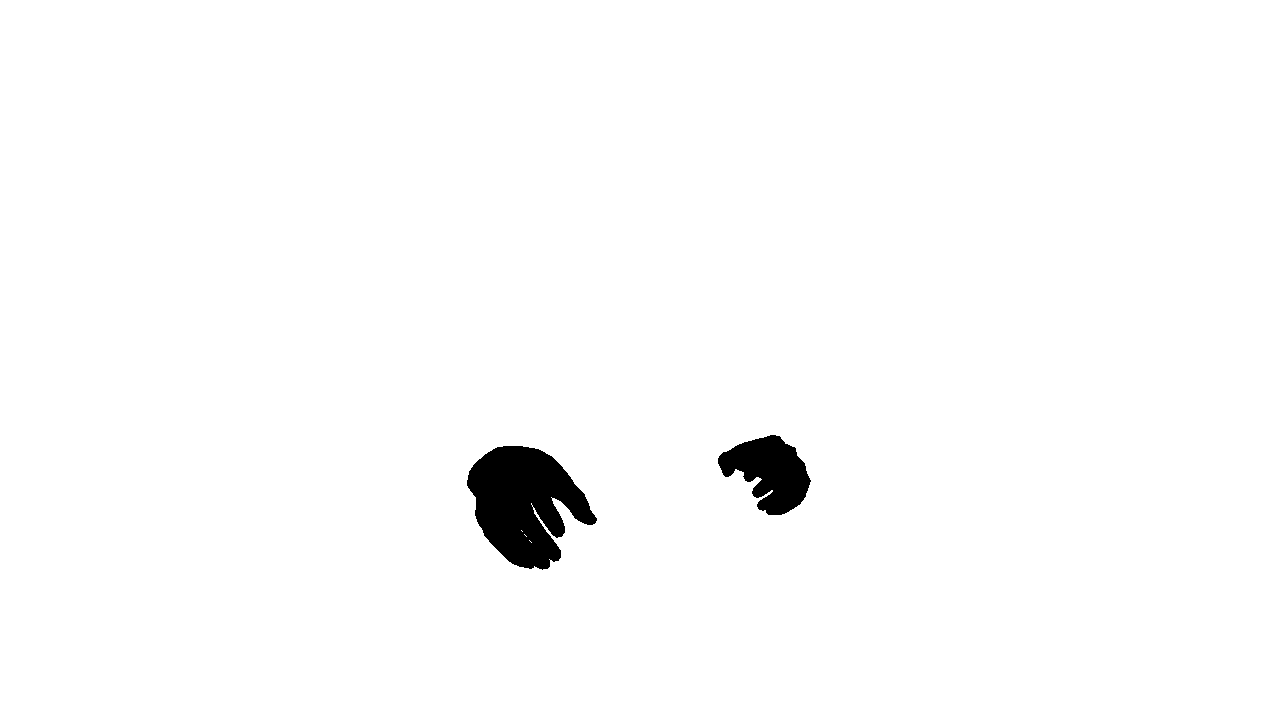

In [10]:
# show image in jupyter notebook
Image(exo_mask_path)

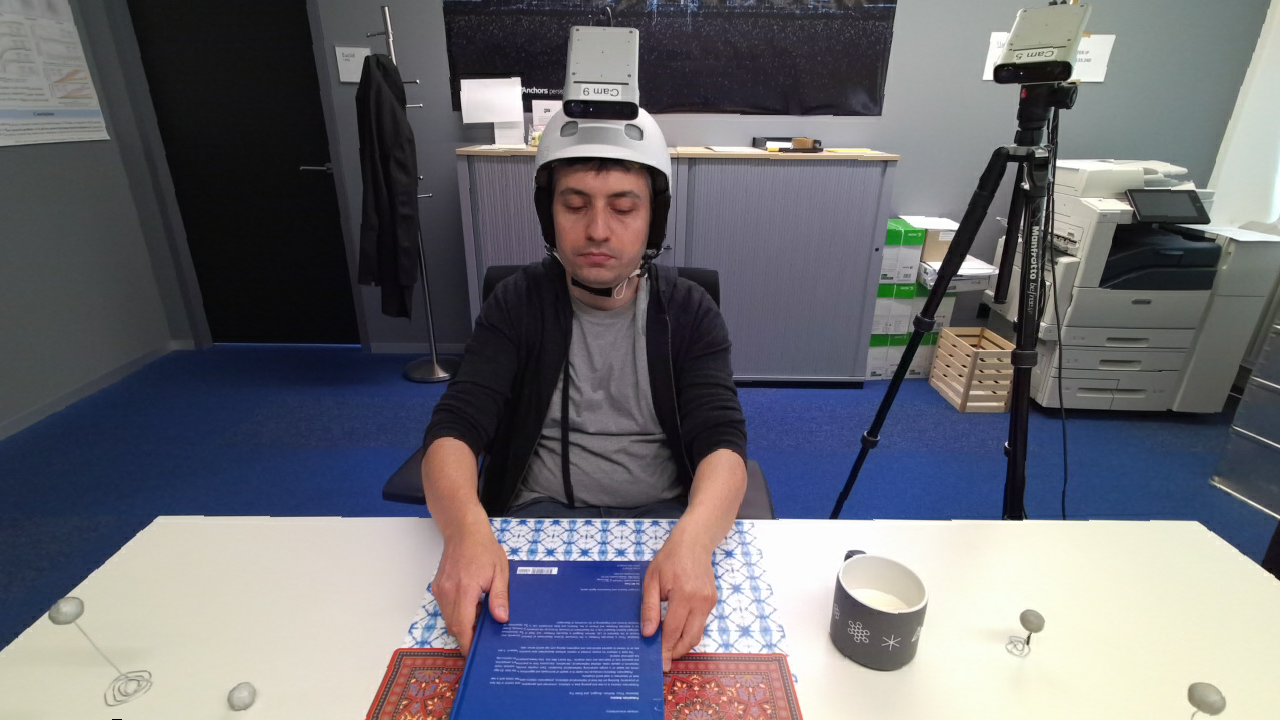

In [11]:
Image(exo_rgb_path)

In [5]:
points, colors = depth2obj(exo_depth_path, exo_rgb_path, exo_cam_int_path, exo_cam_ext_path, 'exo')

mask = cv2.imread(exo_mask_path, cv2.IMREAD_GRAYSCALE)
mask = mask.astype(bool).reshape(-1)
points = points[~mask]
colors = colors[~mask]


# create open3d pointcloud
pointcloud = o3d.geometry.PointCloud()
pointcloud.points = o3d.utility.Vector3dVector(points)
pointcloud.colors = o3d.utility.Vector3dVector(colors)
# save as ply
o3d.io.write_point_cloud(f'test_hand_pointcloud.ply', pointcloud)

True